# Training CNN for the Action Recognition task

In this notebook, we train CNNs on the action recognition task, using PyTorch.

### Import librairies

In [25]:
from utils import *
from dataset import *
from constants import *

import os
import torch
import matplotlib.pyplot as plt
from torch.utils.data import TensorDataset, DataLoader

from dataset import Participant
from models.DeepModels import *
from models.DeepUtils import *

# Reproducibility
seed_num = RANDOM_STATE # This seed will be used for all random number generators
torch.use_deterministic_algorithms(True) # PyTorch will use deterministic algorithms fro operations with stochastic behavior like dropout
random.seed(seed_num) # Python's random will use seed_num
np.random.seed(seed_num) # NumPy's random number generator will use seed_num
torch.manual_seed(seed_num) # PyTorch's random number will use seed_num

### Data loading

Change here the participant to load.

In [26]:
use_saved = True
part_name = 's6'

In [27]:
if use_saved and os.path.exists(f'saved/{part_name}.pkl'):
    participant = Participant.load_from_pickle(f'saved/{part_name}.pkl')
else:
    participant = Participant(part_name, data_path=DATA_PATH_NOTEBOOK, alpha=ALPHA)
    saved_dir = os.path.join(os.getcwd(), 'saved')
    if not os.path.exists(saved_dir):
        os.makedirs(saved_dir)
    with open(f'saved/{part_name}.pkl', 'wb') as f:
        pickle.dump(participant, f, pickle.HIGHEST_PROTOCOL)

## 2D convolutional network

The 2D convolutional network treats the signals' timepoints as pixels of an image.

In [28]:
channels = participant.relevant_channels_both
channels_id = [channel.idx for channel in channels]
sessions = participant.sessions
signals = []
labels = []
for session in sessions:
    for trial in session.trials:
        signals.append([trial.get_signal()[channels_id, :]])
        labels.append(1 if trial.action_type == 'E' else 0)
        
signals = torch.Tensor(np.array(signals))
labels = torch.Tensor(labels).long()

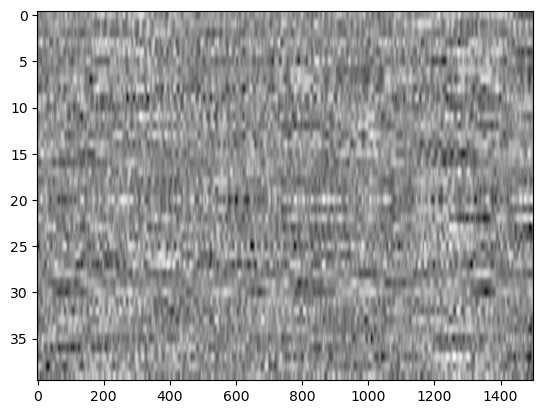

In [29]:
plt.imshow(signals[0][0], cmap='Greys', aspect='auto')

### Dataset preparation

In [30]:
signal_dataset = TensorDataset(signals, labels)
train_set, val_set = torch.utils.data.random_split(signal_dataset, [int(0.8 * len(signal_dataset)), len(signal_dataset) - int(0.8 * len(signal_dataset))])
train_loader = DataLoader(train_set, batch_size=4, shuffle=True)
val_loader = DataLoader(val_set, batch_size=4, shuffle=False)

### Model preparation

In [31]:
model = CNN2D(signals.shape[1], 2, height=signals.shape[2], layers=(32, 16),
    width=signals.shape[3], channels=(2, 4), paddings=(1, 1),
    strides=(3, 3), convkernels=(5, 3), maxpoolkernels=(2, 2))
trainer = Trainer(model, 0.001, 10, 10)

Finally, train the model:

In [32]:
trainer.train(train_loader, val_loader)

Epoch 1/10 - Training: 100%|██████████| 51/51 [00:00<00:00, 118.75it/s]


Epoch: 1 	Training Loss: 0.690045 	Training Acc: 0.509804


Epoch 1/10 - Validation: 100%|██████████| 13/13 [00:00<00:00, 415.98it/s]


Epoch: 1 	Validation Loss: 0.687905 	Validation Acc: 0.480769


Epoch 2/10 - Training: 100%|██████████| 51/51 [00:00<00:00, 156.85it/s]


Epoch: 2 	Training Loss: 0.681454 	Training Acc: 0.514706


Epoch 2/10 - Validation: 100%|██████████| 13/13 [00:00<00:00, 409.55it/s]


Epoch: 2 	Validation Loss: 0.685277 	Validation Acc: 0.480769


Epoch 3/10 - Training: 100%|██████████| 51/51 [00:00<00:00, 154.46it/s]


Epoch: 3 	Training Loss: 0.676186 	Training Acc: 0.720588


Epoch 3/10 - Validation: 100%|██████████| 13/13 [00:00<00:00, 831.86it/s]


Epoch: 3 	Validation Loss: 0.677607 	Validation Acc: 0.884615


Epoch 4/10 - Training: 100%|██████████| 51/51 [00:00<00:00, 155.95it/s]


Epoch: 4 	Training Loss: 0.649124 	Training Acc: 0.857843


Epoch 4/10 - Validation: 100%|██████████| 13/13 [00:00<00:00, 831.95it/s]


Epoch: 4 	Validation Loss: 0.624803 	Validation Acc: 0.846154


Epoch 5/10 - Training: 100%|██████████| 51/51 [00:00<00:00, 78.94it/s] 


Epoch: 5 	Training Loss: 0.565311 	Training Acc: 0.818627


Epoch 5/10 - Validation: 100%|██████████| 13/13 [00:00<00:00, 391.98it/s]


Epoch: 5 	Validation Loss: 0.531244 	Validation Acc: 0.769231


Epoch 6/10 - Training: 100%|██████████| 51/51 [00:00<00:00, 105.43it/s]


Epoch: 6 	Training Loss: 0.491824 	Training Acc: 0.877451


Epoch 6/10 - Validation: 100%|██████████| 13/13 [00:00<00:00, 720.60it/s]


Epoch: 6 	Validation Loss: 0.494328 	Validation Acc: 0.769231


Epoch 7/10 - Training: 100%|██████████| 51/51 [00:00<00:00, 129.96it/s]


Epoch: 7 	Training Loss: 0.458680 	Training Acc: 0.892157


Epoch 7/10 - Validation: 100%|██████████| 13/13 [00:00<00:00, 444.09it/s]


Epoch: 7 	Validation Loss: 0.488787 	Validation Acc: 0.826923


Epoch 8/10 - Training: 100%|██████████| 51/51 [00:00<00:00, 53.83it/s]


Epoch: 8 	Training Loss: 0.417961 	Training Acc: 0.960784


Epoch 8/10 - Validation: 100%|██████████| 13/13 [00:00<00:00, 390.53it/s]


Epoch: 8 	Validation Loss: 0.398328 	Validation Acc: 0.923077


Epoch 9/10 - Training: 100%|██████████| 51/51 [00:00<00:00, 94.14it/s] 


Epoch: 9 	Training Loss: 0.323719 	Training Acc: 0.990196


Epoch 9/10 - Validation: 100%|██████████| 13/13 [00:00<00:00, 540.91it/s]


Epoch: 9 	Validation Loss: 0.347062 	Validation Acc: 0.903846


Epoch 10/10 - Training: 100%|██████████| 51/51 [00:00<00:00, 121.55it/s]


Epoch: 10 	Training Loss: 0.267541 	Training Acc: 0.975490


Epoch 10/10 - Validation: 100%|██████████| 13/13 [00:00<00:00, 559.00it/s]

Epoch: 10 	Validation Loss: 0.336772 	Validation Acc: 0.903846


0.336771689928495

## 1D convolutional network

1D convolutional network treats the signal as it is, that is, a timeserie.

In [33]:
channels = participant.relevant_channels_both
channels_id = [channel.idx for channel in channels]
sessions = participant.sessions
signals = []
labels = []
for session in sessions:
    for trial in session.trials:
        signals.append(trial.get_signal()[channels_id, :])
        labels.append(1 if trial.action_type == 'E' else 0)
        
signals = torch.Tensor(np.array(signals))
labels = torch.Tensor(labels).long()
print(signals.shape)

torch.Size([256, 40, 1500])


### Dataset preparation

In [34]:
signal_dataset = TensorDataset(signals, labels)
train_set, val_set = torch.utils.data.random_split(signal_dataset, [int(0.8 * len(signal_dataset)), len(signal_dataset) - int(0.8 * len(signal_dataset))])
train_loader = DataLoader(train_set, batch_size=4, shuffle=True)
val_loader = DataLoader(val_set, batch_size=4, shuffle=False)

### Model preparation

In [35]:
model = CNN1D(signals.shape[1], 2, length=signals.shape[2],
    channels=(8, 16), paddings=(1, 1), strides=(5, 5), convkernels=(10, 50), maxpoolkernels=(2, 2))
trainer = Trainer(model, 0.001, 10, 10)

Finally, train the model:

In [36]:
trainer.train(train_loader, val_loader)

Epoch 1/10 - Training: 100%|██████████| 51/51 [00:00<00:00, 190.91it/s]


Epoch: 1 	Training Loss: 0.614165 	Training Acc: 0.735294


Epoch 1/10 - Validation: 100%|██████████| 13/13 [00:00<00:00, 831.82it/s]


Epoch: 1 	Validation Loss: 0.497722 	Validation Acc: 0.903846


Epoch 2/10 - Training: 100%|██████████| 51/51 [00:00<00:00, 179.69it/s]


Epoch: 2 	Training Loss: 0.245522 	Training Acc: 0.985294


Epoch 2/10 - Validation: 100%|██████████| 13/13 [00:00<00:00, 820.10it/s]


Epoch: 2 	Validation Loss: 0.200107 	Validation Acc: 0.961538


Epoch 3/10 - Training: 100%|██████████| 51/51 [00:00<00:00, 130.78it/s]


Epoch: 3 	Training Loss: 0.094823 	Training Acc: 0.995098


Epoch 3/10 - Validation: 100%|██████████| 13/13 [00:00<00:00, 415.98it/s]


Epoch: 3 	Validation Loss: 0.127850 	Validation Acc: 0.980769


Epoch 4/10 - Training: 100%|██████████| 51/51 [00:00<00:00, 201.52it/s]


Epoch: 4 	Training Loss: 0.077946 	Training Acc: 1.000000


Epoch 4/10 - Validation: 100%|██████████| 13/13 [00:00<00:00, 717.11it/s]


Epoch: 4 	Validation Loss: 0.141365 	Validation Acc: 0.980769


Epoch 5/10 - Training: 100%|██████████| 51/51 [00:00<00:00, 201.44it/s]


Epoch: 5 	Training Loss: 0.090384 	Training Acc: 0.990196


Epoch 5/10 - Validation: 100%|██████████| 13/13 [00:00<00:00, 831.78it/s]


Epoch: 5 	Validation Loss: 0.211593 	Validation Acc: 0.903846


Epoch 6/10 - Training: 100%|██████████| 51/51 [00:00<00:00, 206.63it/s]


Epoch: 6 	Training Loss: 0.080949 	Training Acc: 1.000000


Epoch 6/10 - Validation: 100%|██████████| 13/13 [00:00<00:00, 656.61it/s]


Epoch: 6 	Validation Loss: 0.141243 	Validation Acc: 0.980769


Epoch 7/10 - Training: 100%|██████████| 51/51 [00:00<00:00, 209.23it/s]


Epoch: 7 	Training Loss: 0.084693 	Training Acc: 1.000000


Epoch 7/10 - Validation: 100%|██████████| 13/13 [00:00<00:00, 831.78it/s]


Epoch: 7 	Validation Loss: 0.153282 	Validation Acc: 0.980769


Epoch 8/10 - Training: 100%|██████████| 51/51 [00:00<00:00, 231.04it/s]


Epoch: 8 	Training Loss: 0.079752 	Training Acc: 1.000000


Epoch 8/10 - Validation: 100%|██████████| 13/13 [00:00<00:00, 637.83it/s]


Epoch: 8 	Validation Loss: 0.104111 	Validation Acc: 0.980769


Epoch 9/10 - Training: 100%|██████████| 51/51 [00:00<00:00, 216.40it/s]


Epoch: 9 	Training Loss: 0.088564 	Training Acc: 1.000000


Epoch 9/10 - Validation: 100%|██████████| 13/13 [00:00<00:00, 832.00it/s]


Epoch: 9 	Validation Loss: 0.131252 	Validation Acc: 0.980769


Epoch 10/10 - Training: 100%|██████████| 51/51 [00:00<00:00, 225.54it/s]


Epoch: 10 	Training Loss: 0.086209 	Training Acc: 1.000000


Epoch 10/10 - Validation: 100%|██████████| 13/13 [00:00<00:00, 831.92it/s]

Epoch: 10 	Validation Loss: 0.111733 	Validation Acc: 0.980769


0.11173333743443856